<a href="https://colab.research.google.com/github/Renee751/Data_Analytics_Python_Github/blob/main/Assignment_Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
gdp = "/content/drive/MyDrive/Colab Notebooks/gdp-per-capita-penn-world-table.csv"
inequality = "/content/drive/MyDrive/Colab Notebooks/inequality.csv"

df_gdp = pd.read_csv(gdp)
df_inequality = pd.read_csv(inequality)

# Clean: drop columns you don't need + rename columns
df_gdp = df_gdp.drop(columns=['Code'])
df_gdp.columns = ['country', 'year', 'gdp']

df_inequality = df_inequality.loc[:,['Country', 'Year','Gini coefficient (before tax) (World Inequality Database)']]
df_inequality.columns = ['country','year', 'gini']

In [ ]:
df_gdp.isnull().sum() # no missing values
df_inequality.isnull().sum() # no missing values

unique_values = df_inequality['gini'].unique()
np.sort(unique_values)
df2_inequality = df_inequality.dropna()
df2_inequality

In [54]:
# Concatenate dataframes
df = pd.concat([df_gdp,df_inequality], ignore_index=True) # match on entity - country.
df.loc[df['country'] == 'Albania']

df = pd.merge(df_gdp, df_inequality, on=['country', 'year'], how='inner')
df

,country,year,gdp,gini
0,Albania,1980,3714.5410,NaN
1,Albania,1981,3786.3180,NaN
2,Albania,1982,3724.3580,NaN
3,Albania,1983,3775.8096,NaN
4,Albania,1984,3738.4922,NaN
...,...,...,...,...
6695,Zimbabwe,2015,2880.9058,NaN
6696,Zimbabwe,2016,2919.6170,NaN
6697,Zimbabwe,2017,3112.8750,0.635799
6698,Zimbabwe,2018,3007.2370,NaN


In [71]:
columns_to_analyze = ['gdp', 'gini']
correlation = df[columns_to_analyze].corr()
correlation #-0.32 = zeer minimale negatieve correlatie. Er is een minimale correlatie tussen het GDP van een land en de income inequality - wanneer gdp stijgt, daalt de income inequality ligt (en visa versa)

# conclusie: je kunt niet stellen dat hier een correlatie is.

,gdp,gini
gdp,1.000000,-0.328668
gini,-0.328668,1.000000


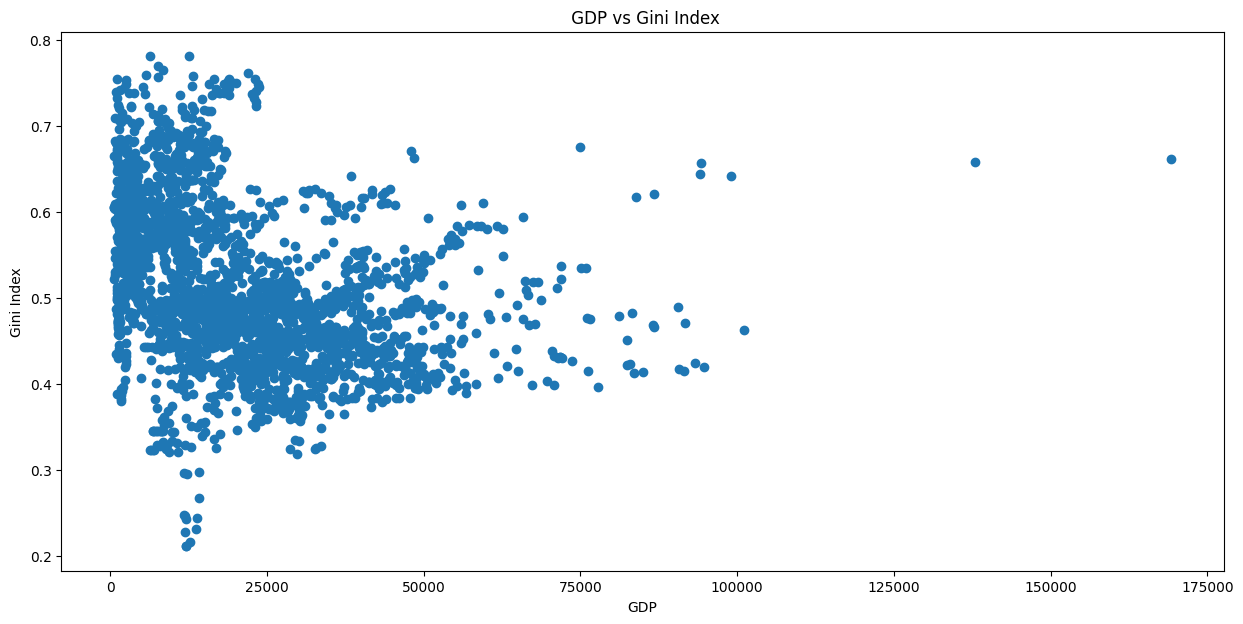

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.scatter(df['gdp'], df['gini'])
plt.xlabel('GDP')
plt.ylabel('Gini Index')
plt.title('GDP vs Gini Index')
plt.show()